<a href="https://colab.research.google.com/github/Tarun-23113/My_Python_Projects/blob/master/Plotting_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv("/content/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


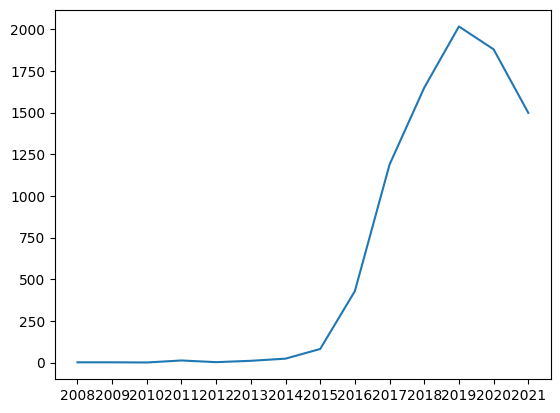

In [9]:
# Plot the number of titles added to Netflix each year (year_added vs. count).

df['year_added'] = df['date_added'].str.extract(r'([0-9]+)$')
x = df.groupby('year_added')['title'].count().reset_index()

plt.plot(x['year_added'], x['title'])
plt.show()

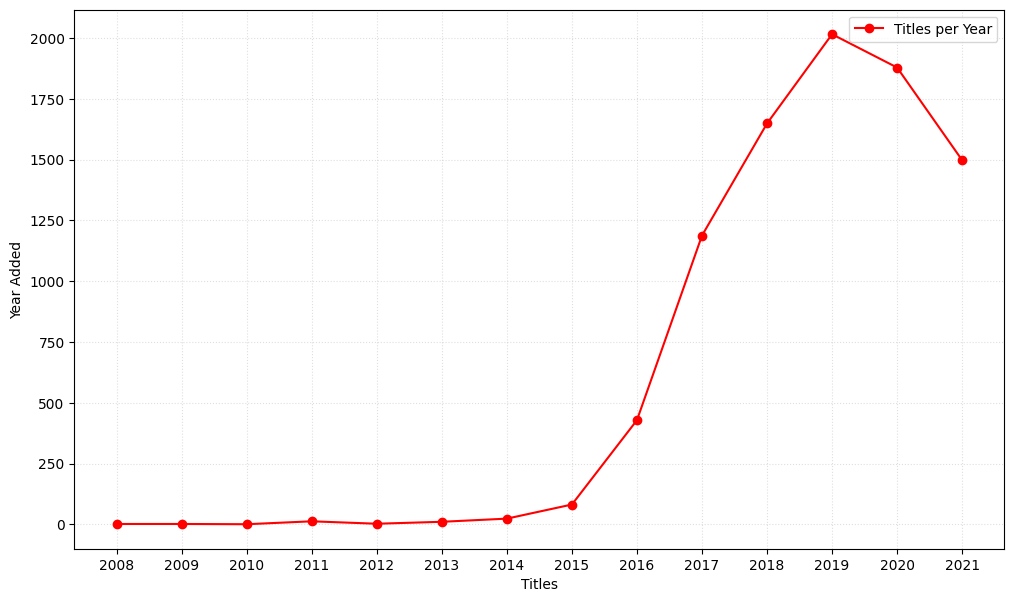

In [10]:
# Customize the plot with markers, line styles, colors, and labels.

plt.figure(figsize=(12, 7))
plt.plot(x['year_added'], x['title'], marker='o', c='r', label='Titles per Year')
plt.xlabel('Titles')
plt.ylabel('Year Added')
plt.grid(alpha=0.4, linestyle=':')
plt.legend()
plt.show()

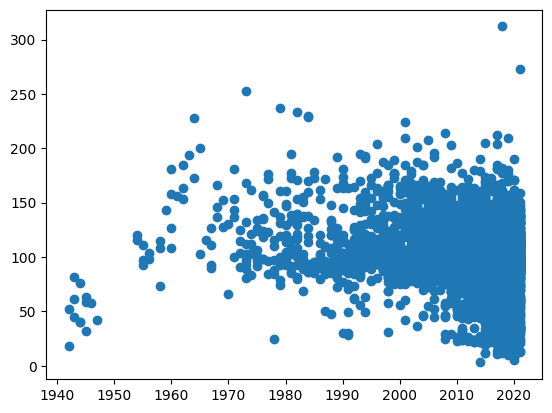

In [19]:
# For movies, plot release_year vs. duration_int.

df['duration_int'] = df['duration'].str.extract(r'^([0-9]+)')
df['duration_int'] = pd.to_numeric(df['duration_int'])
x = df[df['type']=='Movie']['release_year']
y = df[df['type']=='Movie']['duration_int']

plt.scatter(x, y)
plt.show()

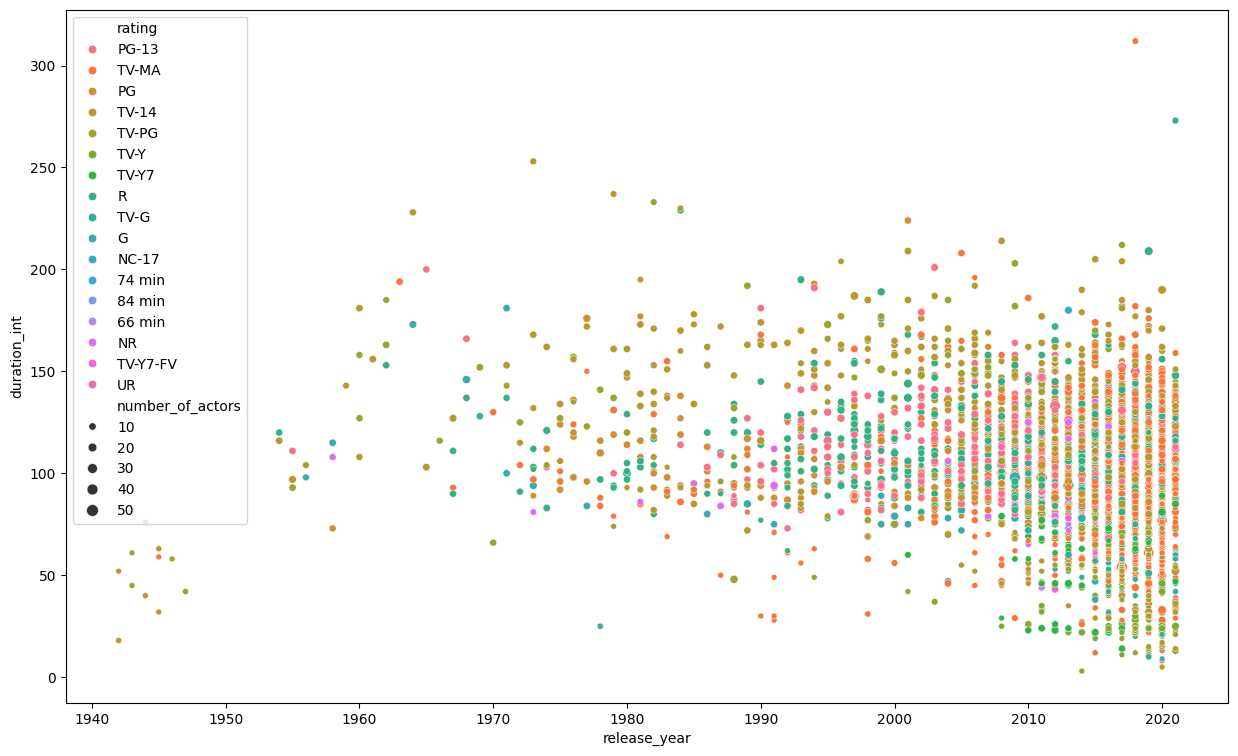

In [39]:
# Use color to represent different ratings and size to represent the number of actors listed in the cast.

df['number_of_actors'] = df['cast'].fillna('').apply(lambda x: len(x.split(',')))

plt.figure(figsize=(15, 9))
sns.scatterplot(data=df, x=x, y=y, hue='rating', size='number_of_actors')
plt.show()

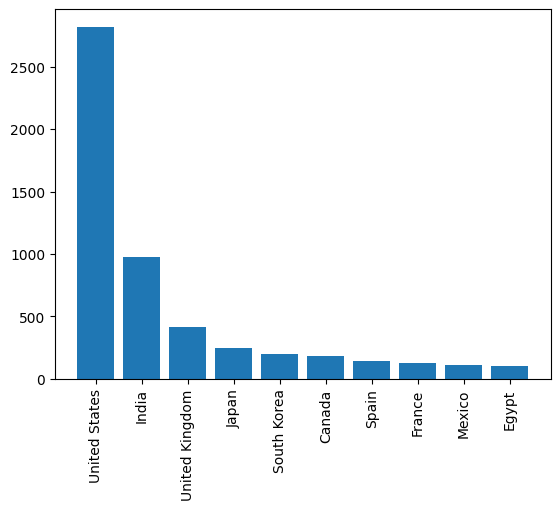

In [49]:
# Display the top 10 countries by the number of titles produced.

x = df['country'].value_counts().sort_values(ascending=False).head(10)

plt.bar(x.index, x.values)
plt.xticks(rotation=90)
plt.show()

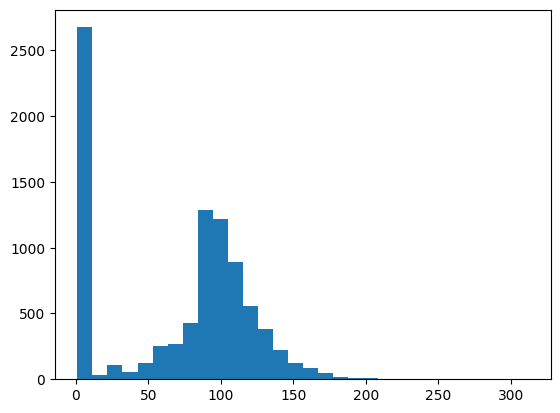

In [54]:
# Plot the distribution of movie durations.

plt.hist(df['duration_int'], bins=30)
plt.show()

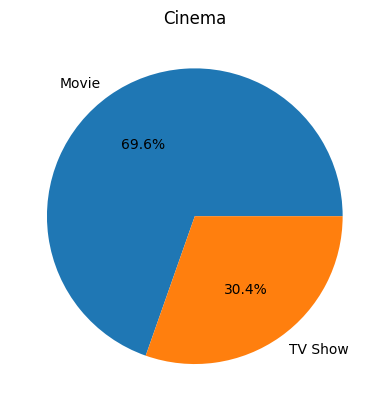

In [57]:
# Show the proportion of content types (Movie vs. TV Show).

x = df['type'].value_counts()

plt.pie(x, labels=['Movie', 'TV Show'], autopct='%1.1f%%')
plt.title('Cinema')
plt.show()